## Resrouce Library

### Resource file name: Resource file name: Data_Explorer_Dataset_MedicalUnderservice_2014_2018

#### Topic: Index of Medical Underservice Score & Providers per 100,000

Source: Health Care Facilities (CMS): Medically Underserved Areas/Populations (MUA/P)

orginal file name: Data_Explorer_Dataset
https://data.hrsa.gov/tools/data-explorer


### Resource file name: Census out

##### Topic: Death Rates by County (and State), geolocations, and census demographics

In [1]:
# Dependencies
import os
import pandas as pd
import numpy as np
import gmaps
import matplotlib.pyplot as plt
from scipy import stats

# Specify path to read file
hrsa = os.path.join("Resources", "Data_Explorer_Dataset_MedicalUnderservice_2014_2018.xlsx", )
census = os.path.join("Resources", "Census out.csv")

# Read in pandas
df = pd.read_excel(hrsa, index_col=None, dtype = str) 
df.fillna('', inplace=True)

census_df = pd.read_csv(census)  

In [2]:
# drop extra identifies
clean_census_df =  census_df.drop(columns=['SummaryLevel', 'StateCode','CountyCode','CountySubdivisionCode','PlaceCode','ConsolidtatedCityCode',
                                          'County','County Name','State_County_x','State_ID_x','County_ID_x','State_County_y','State_ID_y','County_ID_y',
                                          'County_Name','County_State','Never Married Percentage','Unemployed Below Line','No Insurance Over 65 Below Line',
                                          'Living Alone Percentage','Income','Poverty','No Computer'])

In [3]:
# Clean up data to select only county columns
county_df = df[df["Designation Type"] == "Medically Underserved Area"]

# Seperate county and state to merge with census data
county_df["Area"] = county_df["County"].str.split(',').str[0]
county_df["State"] = county_df["County"].str.split(', ').str[1]

# Select only the columns to be merged
county_df = county_df[['Service Area', 'MUA/P Source ID','Index of Medical Underservice Score','County', 'Area','State']]

# Convert numbers to numeric data types
county_df["Index of Medical Underservice Score"] = pd.to_numeric(county_df["Index of Medical Underservice Score"])

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# Merege Census and Geo data with HRSA under serviced data
merged_county_df = pd.merge(county_df, clean_census_df, how="inner", left_on=["State","Area"], right_on=["STATE","Area Name"])

y = -0.03x +58.44
-0.0745477700197967


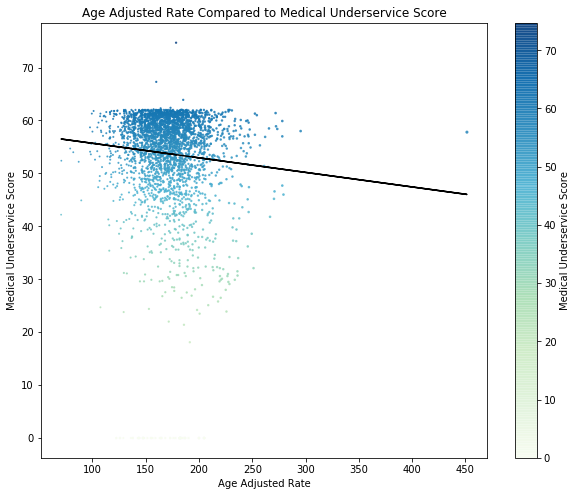

<Figure size 432x288 with 0 Axes>

In [5]:
# Compare Deaths to median household income
x_axis = merged_county_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = merged_county_df.loc[:,'Index of Medical Underservice Score']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

s = merged_county_df.loc[:,'Ratings']

plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'GnBu', s=s, alpha=0.75)
plt.title('Age Adjusted Rate Compared to Medical Underservice Score')
plt.xlabel('Age Adjusted Rate')
plt.ylabel('Medical Underservice Score')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('Medical Underservice Score')
plt.show()
plt.savefig("Underservice.png")

y = -209.52x +85134.05
-0.4605125310950258


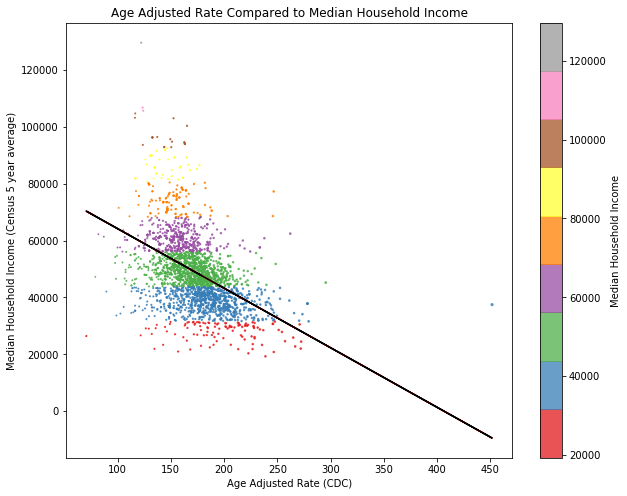

<Figure size 432x288 with 0 Axes>

In [6]:
# Compare Deaths to median age
x_axis = merged_county_df.loc[:,"AGE_ADJUSTED_RATE"]
y_axis = merged_county_df.loc[:,'median household income']
s = merged_county_df.loc[:,'Ratings']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print Pearson's correlation coefficient (rvalue)
print(rvalue)

# Create Plot
plt.figure(figsize=(10,8))
plt.scatter(x_axis, y_axis, c=y_axis, 
            cmap = 'Set1', s=s, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

plt.title('Age Adjusted Rate Compared to Median Household Income')
plt.xlabel('Age Adjusted Rate (CDC)')
plt.ylabel('Median Household Income (Census 5 year average)')
plt.plot(x_axis,regress_values,"k-")
cbar = plt.colorbar()
cbar.set_label('Median Household Income')
plt.show()
plt.savefig("income.png")

In [7]:
corr=merged_county_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=0)

,Index of Medical Underservice Score,AGE_ADJUSTED_RATE,COUNT,POPULATION,lat,lng,Ratings,population size,median age,median household income,NeverMarried Unemployed Male,NeverMarried Unemployed Female,Unemployed Male below line,Unemployed Female below line,4.00 of poverty threshold 65 years and over No health insurance coverage,MEDIAN HOUSEHOLD INCOME Living Alone 65 and over,MEDIAN HOUSEHOLD INCOME Not Living Alone 65 and over,Male Living alone,Female Living alone,Per Capita Income,Poverty Count,Total No Computer,MUA/P
Index of Medical Underservice Score,1.000000,-0.074548,0.055944,0.058625,0.043136,-0.036476,-0.074548,0.058666,-0.066594,0.175378,0.048238,0.044827,0.044613,0.044131,0.052286,0.019321,0.123427,0.053860,0.053984,0.132017,0.052038,0.051667,-0.009721
AGE_ADJUSTED_RATE,-0.074548,1.000000,-0.196444,-0.211895,-0.110926,0.216312,1.000000,-0.212136,0.047804,-0.460513,-0.188999,-0.181075,-0.182534,-0.178899,-0.200738,0.025993,-0.122641,-0.200252,-0.200764,-0.439714,-0.198915,-0.190481,-0.005157
COUNT,0.055944,-0.196444,1.000000,0.990819,-0.056069,-0.140135,-0.196444,0.990689,-0.256854,0.257609,0.990671,0.987256,0.988408,0.985293,0.950167,0.055480,0.271043,0.991668,0.988493,0.272149,0.980977,0.987136,-0.185632
POPULATION,0.058625,-0.211895,0.990819,1.000000,-0.076920,-0.173718,-0.211895,0.999995,-0.261277,0.256205,0.989816,0.981802,0.980606,0.976657,0.973942,0.050813,0.250733,0.981359,0.972050,0.255329,0.991755,0.988179,-0.189042
lat,0.043136,-0.110926,-0.056069,-0.076920,1.000000,-0.114515,-0.110926,-0.076792,0.158872,0.248503,-0.051881,-0.043711,-0.045564,-0.047230,-0.098274,0.016798,0.133968,-0.043226,-0.032320,0.292592,-0.076550,-0.070434,0.189372
lng,-0.036476,0.216312,-0.140135,-0.173718,-0.114515,1.000000,0.216312,-0.173416,0.092332,-0.081630,-0.147451,-0.132105,-0.137655,-0.124561,-0.180090,0.040740,0.072371,-0.122133,-0.100571,0.006340,-0.159176,-0.131867,0.217944
Ratings,-0.074548,1.000000,-0.196444,-0.211895,-0.110926,0.216312,1.000000,-0.212136,0.047804,-0.460513,-0.188999,-0.181075,-0.182534,-0.178899,-0.200738,0.025993,-0.122641,-0.200252,-0.200764,-0.439714,-0.198915,-0.190481,-0.005157
population size,0.058666,-0.212136,0.990689,0.999995,-0.076792,-0.173416,-0.212136,1.000000,-0.261221,0.256174,0.989878,0.981857,0.980595,0.976664,0.974095,0.050796,0.250662,0.981174,0.971914,0.255343,0.991884,0.988164,-0.188903
median age,-0.066594,0.047804,-0.256854,-0.261277,0.158872,0.092332,0.047804,-0.261221,1.000000,-0.160909,-0.254873,-0.254092,-0.267283,-0.266858,-0.226951,-0.031238,-0.184430,-0.270302,-0.269991,0.005403,-0.271238,-0.265364,0.118638
median household income,0.175378,-0.460513,0.257609,0.256205,0.248503,-0.081630,-0.460513,0.256174,-0.160909,1.000000,0.219648,0.209872,0.204252,0.198844,0.209427,0.036125,0.282252,0.258586,0.265294,0.860870,0.203665,0.206345,-0.006152


In [8]:
# Select columns for site name
Site_Name_df = df[['MUA/P Source ID','Designation Type', 'Index of Medical Underservice Score', '% of Population Age 65 and Over','Rural Status']].dropna() 

# Rename columns for site name
Site_Name_df = Site_Name_df.rename(columns={'MUA/P Source ID' : 'Site Name','Designation Type' : 'Site Category', 'Index of Medical Underservice Score' : 'Site Subcategory', '% of Population Age 65 and Over' : 'Longitude','Rural Status' : 'Latitude'})

# Filter out labels (non numeric data values)
Site_Name_df = Site_Name_df[(Site_Name_df["Latitude"] != "Latitude") & (Site_Name_df["Latitude"] != "Non-Rural") & (Site_Name_df["Latitude"] != "Rural") & (Site_Name_df["Latitude"] != "Partially Rural") & (Site_Name_df["Latitude"] != "Rural") & (Site_Name_df["Latitude"] != "Unknown") & 
                            (Site_Name_df["Longitude"] != "") & (Site_Name_df["Latitude"] != "")]

# Convert to numeric
Site_Name_df["Longitude"] = pd.to_numeric(Site_Name_df["Longitude"])
Site_Name_df["Latitude"] = pd.to_numeric(Site_Name_df["Latitude"])


In [9]:
# Plot map for underserviced counties
locations = Site_Name_df[["Latitude", "Longitude"]]

# # Fill NaN values and convert to float
# rating = df["Count_Ratings"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations,  
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig



Figure(layout=FigureLayout(height='420px'))

In [10]:
state_df = merged_county_df[["STATE","Index of Medical Underservice Score","AGE_ADJUSTED_RATE"]]

In [11]:
state_df = state_df.groupby("STATE").mean()

In [12]:
corr=state_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=0)

,Index of Medical Underservice Score,AGE_ADJUSTED_RATE
Index of Medical Underservice Score,1.000000,-0.338547
AGE_ADJUSTED_RATE,-0.338547,1.000000
